In [1]:
from utils.cluster import *
from utils.geo import *
from utils.loaddata import *
from utils.utils import *

In [2]:
data = get_h5data("./data/UnicomBJ_flows.h5")
print(data.shape)
print("time interval amounts(1 hour): ", data.shape[0])
print("grid horizontal amounts: ", data.shape[2])
print("grid vertical amounts: ", data.shape[3])

(2184, 2, 32, 32)
time interval amounts(1 hour):  2184
grid horizontal amounts:  32
grid vertical amounts:  32


In [3]:
inflow = data[:, 0, :, :].reshape(len(data), -1).T
outflow = data[:, 0, :, :].reshape(len(data), -1).T

# normalize
inflow_norm = norm_by_row(inflow)
outflow_norm = norm_by_row(outflow)

print("inflow_norm shape: ", inflow_norm.shape, \
    "outflow_norm shape: ", outflow_norm.shape)

inflow_norm shape:  (1024, 2184) outflow_norm shape:  (1024, 2184)


In [4]:
# cluster expriments
import matplotlib.pyplot as plt
from numpy import *
from tqdm import *

cluster_methods = ['kmeans', 'kpp_means', 'bi_kmeans', 'dbscan', 'Optics']

# kmeans耗时过长，在k=12时就呈现出无法收敛的状态，平均每次聚类耗费时间10m以上
# kmeans_sse = []
# kmeans_stds = []
# for i in trange(3, 30):
#     cur_sses = []
#     for j in trange(0, 10):
#         centroid, cluster_assment = kmeans(inflow_norm, i)
#         cur_sses.append(sum(cluster_assment[:,1]))
#     kmeans_sse.append(sum(cur_sses)/10)
#     kmeans_stds.append(std(cur_sses, ddof=1))

<Figure size 1440x1440 with 0 Axes>

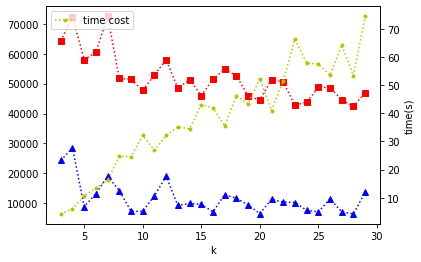

In [10]:
kmeans_times = [4.26, 6.08, 10.72, 13.46, 16.25, 24.69, 24.61, 32.11, 26.86, 32.14, 35.20, 34.50, 42.94, 41.96, 35.52, 46.26, 43.34, 52.29, 40.97, 51.54, 66.32, 57.84, 57.45, 53.48, 64.21, 53.36, 74.43]

fig = plt.figure(figsize=(20, 20))
_, ax = plt.subplots()
ax.plot(range(3, 30), kmeans_sse, c='r', ls=':', marker='s', label='sse')
ax.plot(range(3, 30), kmeans_stds, c='b', ls=':', marker='^', label='std')
ax.set_xlabel('k')

ax1 = ax.twinx()
ax1.plot(range(3, 30), kmeans_times, c='y', ls=':', marker='.', label='time cost')
ax1.set_ylabel('time(s)')

plt.legend()
plt.show()

In [12]:
np.save('kmeans_sse.npy',kmeans_sse)
np.save('kmeans_stds.npy',kmeans_stds)

In [ ]:
kpp_means_sse = []
kpp_means_stds = []
for i in trange(3, 30):
    cur_sses = []
    for j in trange(0, 10):
        centroid, cluster_assment = kpp_means(mat(inflow_norm), i)
        cur_sses.append(sum(cluster_assment[:,1]))
    kpp_means_sse.append(sum(cur_sses)/10)
    kpp_means_stds.append(std(cur_sses, ddof=1))

<Figure size 1440x1440 with 0 Axes>

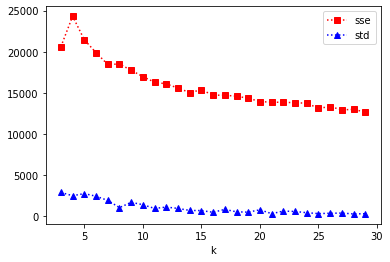

In [14]:
fig = plt.figure(figsize=(20, 20))
_, ax = plt.subplots()
ax.plot(range(3, 30), kpp_means_sse, c='r', ls=':', marker='s', label='sse')
ax.plot(range(3, 30), kpp_means_stds, c='b', ls=':', marker='^', label='std')
ax.set_xlabel('k')

plt.legend()
plt.show()

In [15]:
np.save('kpp_means_sse.npy',kpp_means_sse)
np.save('kpp_means_stds.npy',kpp_means_stds)

In [5]:
bi_kmeans_sse = []
bi_kmeans_stds = []
for i in trange(3, 30):
    cur_sses = []
    for j in trange(0, 10):
        centroid, cluster_assment = bi_kmeans(mat(inflow_norm), i)
        cur_sses.append(sum(cluster_assment[:,1]))
    bi_kmeans_sse.append(sum(cur_sses)/10)
    bi_kmeans_stds.append(std(cur_sses, ddof=1))

  0%|          | 0/27 [00:00<?, ?it/s]

sse_split, sse_nonsplit 31356.62826469582 0.0
the bestCentToSplit is:  0
the len of bestClustAss is:  1024
sse_split, sse_nonsplit 12258.57087715788 30420.180945757373


sse_split, sse_nonsplit 6318.346928789634 936.4473189384519
the bestCentToSplit is:  1
the len of bestClustAss is:  573
sse_split, sse_nonsplit 28463.140687131432 0.0
the bestCentToSplit is:  0
the len of bestClustAss is:  1024
sse_split, sse_nonsplit 35172.611948989754 25841.351920873778


sse_split, sse_nonsplit 33979.866297694054 2621.788766257655
the bestCentToSplit is:  1
the len of bestClustAss is:  445
sse_split, sse_nonsplit 14988.354133923902 0.0
the bestCentToSplit is:  0
the len of bestClustAss is:  1024
sse_split, sse_nonsplit 16971.02562341521 14988.354133923902


sse_split, sse_nonsplit 28309.079016078453 0.0
the bestCentToSplit is:  1
the len of bestClustAss is:  445
sse_split, sse_nonsplit 17030.655788124273 0.0
the bestCentToSplit is:  0
the len of bestClustAss is:  1024
sse_split, sse_nonsplit 18601.575526486267 17030.655788124273


sse_split, sse_nonsplit 11865.40245101149 0.0
the bestCentToSplit is:  1
the len of bestClustAss is:  573
sse_split, sse_nonsplit 77324.20375735534 0.0
the bestCentToSplit is:  0
the len of bestClustAss is:  1024
sse_split, sse_nonsplit 19147.824611552915 71847.54397646427


sse_split, sse_nonsplit 24176.092733307327 5476.659780891063
the bestCentToSplit is:  1
the len of bestClustAss is:  449
sse_split, sse_nonsplit 70706.6331265283 0.0
the bestCentToSplit is:  0
the len of bestClustAss is:  1024
sse_split, sse_nonsplit 39074.367075982766 63093.52060362605


sse_split, sse_nonsplit 18764.433255826945 7613.112522902245
the bestCentToSplit is:  1
the len of bestClustAss is:  579
sse_split, sse_nonsplit 93728.55534867504 0.0
the bestCentToSplit is:  0
the len of bestClustAss is:  1024
sse_split, sse_nonsplit 30047.17569707356 79111.74051118153


sse_split, sse_nonsplit 42939.606516216 14616.814837493515
the bestCentToSplit is:  1
the len of bestClustAss is:  451
sse_split, sse_nonsplit 19948.272878301803 0.0
the bestCentToSplit is:  0
the len of bestClustAss is:  1024
sse_split, sse_nonsplit 6210.439478268996 17179.445089087312


sse_split, sse_nonsplit 36299.51448457599 2768.82778921449
the bestCentToSplit is:  0
the len of bestClustAss is:  451
sse_split, sse_nonsplit 55575.78752208044 0.0
the bestCentToSplit is:  0
the len of bestClustAss is:  1024
sse_split, sse_nonsplit 7111.244563582638 53695.18389473929


sse_split, sse_nonsplit 33624.31110484731 1880.6036273411548
the bestCentToSplit is:  1
the len of bestClustAss is:  445
sse_split, sse_nonsplit 91465.51393073396 0.0
the bestCentToSplit is:  0
the len of bestClustAss is:  1024
sse_split, sse_nonsplit 9113.899962521731 78598.45361289168


  4%|▎         | 1/27 [07:18<3:09:49, 438.04s/it]

sse_split, sse_nonsplit 12862.226286287652 12867.060317842268
the bestCentToSplit is:  1
the len of bestClustAss is:  451


sse_split, sse_nonsplit 23645.561995204764 0.0
the bestCentToSplit is:  0
the len of bestClustAss is:  1024
sse_split, sse_nonsplit 26507.41358474194 20717.58852589483
sse_split, sse_nonsplit 36263.11461392677 2927.9734693099376
the bestCentToSplit is:  1
the len of bestClustAss is:  445
sse_split, sse_nonsplit 19477.36091814194 36263.11461392677
sse_split, sse_nonsplit 3246.323769590114 35085.52026455094


sse_split, sse_nonsplit 5751.333761969669 7033.541287995707
the bestCentToSplit is:  2
the len of bestClustAss is:  277
sse_split, sse_nonsplit 88132.5827407327 0.0
the bestCentToSplit is:  0
the len of bestClustAss is:  1024
sse_split, sse_nonsplit 24391.024599140528 72572.29323877877
sse_split, sse_nonsplit 36947.321488867165 15560.289501953925
the bestCentToSplit is:  1
the len of bestClustAss is:  579
sse_split, sse_nonsplit 25746.24152713125 36947.321488867165
sse_split, sse_nonsplit 5627.315546310162 47826.51599449769


sse_split, sse_nonsplit 13960.793244823384 20241.384498277315
the bestCentToSplit is:  2
the len of bestClustAss is:  293
sse_split, sse_nonsplit 21608.58521194807 0.0
the bestCentToSplit is:  0
the len of bestClustAss is:  1024
sse_split, sse_nonsplit 11376.892610122386 21393.220664806584
sse_split, sse_nonsplit 25661.166823244217 215.36454714148283
the bestCentToSplit is:  1
the len of bestClustAss is:  573


C:\Users\24796\Miniconda3\envs\citycal\lib\site-packages\numpy\matrixlib\defmatrix.py:447: RuntimeWarning: Mean of empty slice.
  return N.ndarray.mean(self, axis, dtype, out, keepdims=True)._collapse(axis)
C:\Users\24796\Miniconda3\envs\citycal\lib\site-packages\numpy\core\_methods.py:154: RuntimeWarning: invalid value encountered in true_divide
  ret, rcount, out=ret, casting='unsafe', subok=False)


sse_split, sse_nonsplit 55459.56029806314 25661.166823244217
sse_split, sse_nonsplit 12361.125338639516 21657.703088622904


sse_split, sse_nonsplit 11774.681985043277 4434.192828904279
the bestCentToSplit is:  2
the len of bestClustAss is:  288
sse_split, sse_nonsplit 80229.05352464312 0.0
the bestCentToSplit is:  0
the len of bestClustAss is:  1024
sse_split, sse_nonsplit 38129.361920735435 67143.19067468567
sse_split, sse_nonsplit 28005.10713944878 13085.862849957452
the bestCentToSplit is:  1
the len of bestClustAss is:  445
sse_split, sse_nonsplit 9286.19564572049 28005.10713944878
sse_split, sse_nonsplit 9306.480156650467 36842.61299008514


sse_split, sse_nonsplit 10319.093190492942 17334.219849278546
the bestCentToSplit is:  2
the len of bestClustAss is:  174
sse_split, sse_nonsplit 97245.58056209123 0.0
the bestCentToSplit is:  0
the len of bestClustAss is:  1024
sse_split, sse_nonsplit 15906.280135812893 83414.31443020003
sse_split, sse_nonsplit 36223.45628325692 13831.266131891214
the bestCentToSplit is:  1
the len of bestClustAss is:  451
sse_split, sse_nonsplit 35928.257800650295 36223.45628325692
sse_split, sse_nonsplit 6815.046308346108 47744.67417985652


sse_split, sse_nonsplit 3649.1264076004727 16141.314367182818
the bestCentToSplit is:  2
the len of bestClustAss is:  314
sse_split, sse_nonsplit 78687.09346122947 0.0
the bestCentToSplit is:  0
the len of bestClustAss is:  1024
sse_split, sse_nonsplit 30652.733247104854 74275.6210067991
sse_split, sse_nonsplit 27989.06310502689 4411.472454430363
the bestCentToSplit is:  1
the len of bestClustAss is:  451
sse_split, sse_nonsplit 30309.383664951813 27989.06310502689
sse_split, sse_nonsplit 11930.170254084063 27650.41237526749


sse_split, sse_nonsplit 17161.977501061516 9161.595638620125
the bestCentToSplit is:  2
the len of bestClustAss is:  180
sse_split, sse_nonsplit 79049.39512412116 0.0
the bestCentToSplit is:  0
the len of bestClustAss is:  1024
sse_split, sse_nonsplit 10038.418116076464 70734.79555134616
sse_split, sse_nonsplit 37211.26791971725 8314.599572775009
the bestCentToSplit is:  1
the len of bestClustAss is:  445
sse_split, sse_nonsplit 26733.04182152343 37211.26791971725
sse_split, sse_nonsplit 5719.559130184426 44574.05829556017


sse_split, sse_nonsplit 4151.3170058461 9266.40876970709
the bestCentToSplit is:  2
the len of bestClustAss is:  328
sse_split, sse_nonsplit 87594.95691524133 0.0
the bestCentToSplit is:  0
the len of bestClustAss is:  1024
sse_split, sse_nonsplit 6571.64331036881 74716.12282441297
sse_split, sse_nonsplit 39085.23676719058 12878.834090828377
the bestCentToSplit is:  1
the len of bestClustAss is:  450
sse_split, sse_nonsplit 40013.61743647256 39085.23676719058
sse_split, sse_nonsplit 4460.563333702016 50809.75255333783


sse_split, sse_nonsplit 4015.0889547351007 14033.152395509513
the bestCentToSplit is:  2
the len of bestClustAss is:  329
sse_split, sse_nonsplit 63188.59922283028 0.0
the bestCentToSplit is:  0
the len of bestClustAss is:  1024
sse_split, sse_nonsplit 35687.80912743343 60774.51984206886
sse_split, sse_nonsplit 22653.206181933467 2414.079380761411
the bestCentToSplit is:  1
the len of bestClustAss is:  579
sse_split, sse_nonsplit 11043.651500775584 22653.206181933467
sse_split, sse_nonsplit 7615.380145379215 24899.432192665947


sse_split, sse_nonsplit 4124.597208272091 2581.9327507903467
the bestCentToSplit is:  2
the len of bestClustAss is:  286
sse_split, sse_nonsplit 14677.357583529225 0.0
the bestCentToSplit is:  0
the len of bestClustAss is:  1024
sse_split, sse_nonsplit 34828.92223122971 14677.357583529225
sse_split, sse_nonsplit 38569.26078061188 0.0
the bestCentToSplit is:  1
the len of bestClustAss is:  573
sse_split, sse_nonsplit 37815.50612416344 38569.26078061188
sse_split, sse_nonsplit 12556.57399575532 32893.927254711


  7%|▋         | 2/27 [18:19<3:57:23, 569.73s/it]

sse_split, sse_nonsplit 3161.9786320822805 5675.333525900878
the bestCentToSplit is:  2
the len of bestClustAss is:  291


sse_split, sse_nonsplit 42526.03852442759 0.0
the bestCentToSplit is:  0
the len of bestClustAss is:  1024
sse_split, sse_nonsplit 11095.113615700147 40158.95228388365
sse_split, sse_nonsplit 13313.748068935267 2367.08624054394
the bestCentToSplit is:  1
the len of bestClustAss is:  573
sse_split, sse_nonsplit 9610.511649859494 13313.748068935267
sse_split, sse_nonsplit 10286.092704873585 15465.777406493988
sse_split, sse_nonsplit 2260.600336260364 2582.1431435291606
the bestCentToSplit is:  2
the len of bestClustAss is:  282
sse_split, sse_nonsplit 30864.746743554417 2475.657239245584
sse_split, sse_nonsplit 11713.843525964978 4627.686576804304
sse_split, sse_nonsplit 2826.071405676409 4806.034076528369


sse_split, sse_nonsplit 771.8797211540196 2618.8525467903164
the bestCentToSplit is:  3
the len of bestClustAss is:  135
sse_split, sse_nonsplit 19837.386416592366 0.0
the bestCentToSplit is:  0
the len of bestClustAss is:  1024
sse_split, sse_nonsplit 34956.624596273614 18326.603684279457
sse_split, sse_nonsplit 30908.885082191257 1510.7827323129102
the bestCentToSplit is:  1
the len of bestClustAss is:  574
sse_split, sse_nonsplit 7750.161676088029 30908.885082191257
sse_split, sse_nonsplit 12834.892800837411 29698.508264051496
sse_split, sse_nonsplit 9853.174957308616 4231.942282765574
the bestCentToSplit is:  2
the len of bestClustAss is:  290
sse_split, sse_nonsplit 36030.2797752171 12574.334507761283
sse_split, sse_nonsplit 12661.875932078852 11363.957689621528
sse_split, sse_nonsplit 4890.208469200021 13103.424514883814


sse_split, sse_nonsplit 1871.7997468468197 5213.635007955953
the bestCentToSplit is:  3
the len of bestClustAss is:  151
sse_split, sse_nonsplit 91702.9023792895 0.0
the bestCentToSplit is:  0
the len of bestClustAss is:  1024
sse_split, sse_nonsplit 6679.272582363021 77203.4948028831
sse_split, sse_nonsplit 23259.217748958763 14499.407576406404
the bestCentToSplit is:  1
the len of bestClustAss is:  451
sse_split, sse_nonsplit 27066.85727269589 23259.217748958763
sse_split, sse_nonsplit 13889.64589426811 32388.55380078129
sse_split, sse_nonsplit 7537.755762475939 19869.479100990276
the bestCentToSplit is:  2
the len of bestClustAss is:  139
sse_split, sse_nonsplit 31427.292879450033 12907.827287059818
sse_split, sse_nonsplit 17683.47402231618 22037.163338882347
sse_split, sse_nonsplit 3427.233863348433 26264.45974199089


sse_split, sse_nonsplit 1152.4730696225058 21012.254222465606
the bestCentToSplit is:  3
the len of bestClustAss is:  73
sse_split, sse_nonsplit 83582.1838665109 0.0
the bestCentToSplit is:  0
the len of bestClustAss is:  1024
sse_split, sse_nonsplit 41965.37028234597 77584.61544980304
sse_split, sse_nonsplit 10455.864562341598 5997.568416707867
the bestCentToSplit is:  1
the len of bestClustAss is:  579
sse_split, sse_nonsplit 42403.617553601754 10455.864562341598
sse_split, sse_nonsplit 1749.1332115247587 16121.644058111375
sse_split, sse_nonsplit 15894.905781000105 6329.357337645957
the bestCentToSplit is:  1
the len of bestClustAss is:  293
sse_split, sse_nonsplit 10727.606247724401 11873.208852928266
sse_split, sse_nonsplit 7293.147491860103 17700.37149900777
sse_split, sse_nonsplit 9847.555602484368 7746.701628232626


sse_split, sse_nonsplit 4411.589745008505 16292.049828739739
the bestCentToSplit is:  2
the len of bestClustAss is:  286
sse_split, sse_nonsplit 78135.42181135499 0.0
the bestCentToSplit is:  0
the len of bestClustAss is:  1024
sse_split, sse_nonsplit 35816.43210220337 65923.96713006306
sse_split, sse_nonsplit 17621.159311603955 12211.454681291929
the bestCentToSplit is:  1
the len of bestClustAss is:  445
sse_split, sse_nonsplit 38185.91656479529 17621.159311603955
sse_split, sse_nonsplit 5451.444361555112 29599.845787279555
sse_split, sse_nonsplit 17405.304434866644 12444.222886908254
the bestCentToSplit is:  2
the len of bestClustAss is:  281
sse_split, sse_nonsplit 6011.6847301664275 17638.07264048297
sse_split, sse_nonsplit 3732.7292068874485 29616.759116158573
sse_split, sse_nonsplit 1729.4533904958005 29173.832406713398


sse_split, sse_nonsplit 2277.7187056663583 13119.917801969754
the bestCentToSplit is:  3
the len of bestClustAss is:  191
sse_split, sse_nonsplit 81530.34703358964 0.0
the bestCentToSplit is:  0
the len of bestClustAss is:  1024
sse_split, sse_nonsplit 10253.205603964798 77678.27043491257
sse_split, sse_nonsplit 4528.958950623091 3852.0765986770707
the bestCentToSplit is:  1
the len of bestClustAss is:  451
sse_split, sse_nonsplit 20718.08026134727 4528.958950623091
sse_split, sse_nonsplit 12428.28651281332 8015.891638256067
sse_split, sse_nonsplit 2187.187197000091 4217.220509721165
the bestCentToSplit is:  2
the len of bestClustAss is:  154
sse_split, sse_nonsplit 38940.13485975267 2552.3311080441863
sse_split, sse_nonsplit 6153.595354145072 6039.263795677161
sse_split, sse_nonsplit 813.0242956605138 6173.508571566383


sse_split, sse_nonsplit 787.6928565315407 4448.119644876039
the bestCentToSplit is:  3
the len of bestClustAss is:  70
sse_split, sse_nonsplit 28181.12542116855 0.0
the bestCentToSplit is:  0
the len of bestClustAss is:  1024
sse_split, sse_nonsplit 41062.94271962281 28148.457226279803
sse_split, sse_nonsplit 21814.50596168841 32.66819488874642
the bestCentToSplit is:  1
the len of bestClustAss is:  573
sse_split, sse_nonsplit 17407.61649640719 21814.50596168841
sse_split, sse_nonsplit 10525.916625845884 19971.357039569706
sse_split, sse_nonsplit 15210.562486556377 1908.485311896195
the bestCentToSplit is:  2
the len of bestClustAss is:  291
sse_split, sse_nonsplit 37157.82873522361 17086.379603563826
sse_split, sse_nonsplit 14291.410349769523 15243.230681445122
sse_split, sse_nonsplit 499.32199973271264 16170.584809474862


sse_split, sse_nonsplit 7927.6364947924985 2856.948300873907
the bestCentToSplit is:  3
the len of bestClustAss is:  194
sse_split, sse_nonsplit 74628.06039778554 0.0
the bestCentToSplit is:  0
the len of bestClustAss is:  1024
sse_split, sse_nonsplit 38559.037798166915 72636.5413374396
sse_split, sse_nonsplit 37279.78922258031 1991.5190603459241
the bestCentToSplit is:  1
the len of bestClustAss is:  450
sse_split, sse_nonsplit 6582.916174926271 37279.78922258031
sse_split, sse_nonsplit 7069.8090389732315 35611.74812446246
sse_split, sse_nonsplit 16759.426610150236 5651.0792188097
the bestCentToSplit is:  2
the len of bestClustAss is:  311
sse_split, sse_nonsplit 37393.580952983924 20418.98676861401
sse_split, sse_nonsplit 7055.425623825691 18750.945670496156
sse_split, sse_nonsplit 2693.697732073933 21315.130047506493


sse_split, sse_nonsplit 6810.685197838642 6746.45500026314
the bestCentToSplit is:  3
the len of bestClustAss is:  193
sse_split, sse_nonsplit 78452.2275123792 0.0
the bestCentToSplit is:  0
the len of bestClustAss is:  1024
sse_split, sse_nonsplit 19892.045517432052 64234.43093790371
sse_split, sse_nonsplit 36942.48375887076 14217.796574475502
the bestCentToSplit is:  1
the len of bestClustAss is:  579
sse_split, sse_nonsplit 24182.17603232039 36942.48375887076
sse_split, sse_nonsplit 4795.677280132775 46635.14445769382
sse_split, sse_nonsplit 15327.37482007932 18742.932450127937
the bestCentToSplit is:  2
the len of bestClustAss is:  291
sse_split, sse_nonsplit 22900.55625853772 19852.510695731755
sse_split, sse_nonsplit 8648.099694074983 29545.171394554818
sse_split, sse_nonsplit 1904.6793482772969 33242.41808155259


sse_split, sse_nonsplit 7820.464616525213 19570.821638782596
the bestCentToSplit is:  3
the len of bestClustAss is:  217
sse_split, sse_nonsplit 22994.106428803672 0.0
the bestCentToSplit is:  0
the len of bestClustAss is:  1024
sse_split, sse_nonsplit 32649.782242030404 22947.110055331796
sse_split, sse_nonsplit 18883.519533440052 46.99637347187817
the bestCentToSplit is:  1
the len of bestClustAss is:  573
sse_split, sse_nonsplit 12222.306928478582 18883.519533440052
sse_split, sse_nonsplit 9451.624588214057 18171.549109453437
sse_split, sse_nonsplit 13898.676577926377 805.9631709303719
the bestCentToSplit is:  2
the len of bestClustAss is:  282
sse_split, sse_nonsplit 38902.28229306143 14657.643375384872
sse_split, sse_nonsplit 0.0 13945.672951398255
sse_split, sse_nonsplit 3445.3834505143323 14200.562847992254


 11%|█         | 3/27 [32:47<4:42:21, 705.91s/it]

sse_split, sse_nonsplit 1387.1027004334517 1310.0400717948664
the bestCentToSplit is:  3
the len of bestClustAss is:  205


sse_split, sse_nonsplit 72802.16165432856 0.0
the bestCentToSplit is:  0
the len of bestClustAss is:  1024
sse_split, sse_nonsplit 6492.514630074049 64867.01450738457
sse_split, sse_nonsplit 28569.788054042598 7935.1471469439975
the bestCentToSplit is:  1
the len of bestClustAss is:  445
sse_split, sse_nonsplit 33810.94975335304 28569.788054042598
sse_split, sse_nonsplit 10429.932046901013 31522.8569896607
sse_split, sse_nonsplit 11081.063666497123 12917.225358269889
the bestCentToSplit is:  2
the len of bestClustAss is:  273
sse_split, sse_nonsplit 26741.913225120225 16063.141877823015
sse_split, sse_nonsplit 9735.10254477059 19016.210813441117
sse_split, sse_nonsplit 2359.9981482880207 21625.502564962146
sse_split, sse_nonsplit 948.4200700794598 15290.011818074754
the bestCentToSplit is:  3
the len of bestClustAss is:  100
sse_split, sse_nonsplit 10661.528204707673 8303.284741210218
sse_split, sse_nonsplit 7046.167420623971 11256.353676828323
sse_split, sse_nonsplit 4697.348003429168

sse_split, sse_nonsplit 43.45274644908832 15329.045809999427
the bestCentToSplit is:  4
the len of bestClustAss is:  57
sse_split, sse_nonsplit 29531.53818758591 0.0
the bestCentToSplit is:  0
the len of bestClustAss is:  1024
sse_split, sse_nonsplit 27720.67536139412 28662.068625883236
sse_split, sse_nonsplit 23986.633076652237 869.4695617026757
the bestCentToSplit is:  1
the len of bestClustAss is:  573
sse_split, sse_nonsplit 35181.94463052739 23986.633076652237
sse_split, sse_nonsplit 13166.45664605324 24744.882992759412
sse_split, sse_nonsplit 6452.803506986122 980.6892072981776
the bestCentToSplit is:  2
the len of bestClustAss is:  282
sse_split, sse_nonsplit 33104.6916877635 6564.023152581623
sse_split, sse_nonsplit 10859.923824771377 7322.273068688798
sse_split, sse_nonsplit 1960.1311792593751 6112.191431668266
sse_split, sse_nonsplit 1875.1523618986234 2301.9904899142102
the bestCentToSplit is:  3
the len of bestClustAss is:  135
sse_split, sse_nonsplit 15930.718588822467 330

sse_split, sse_nonsplit 1425.7655352886227 2454.918770527938
the bestCentToSplit is:  4
the len of bestClustAss is:  46
sse_split, sse_nonsplit 25527.846388973427 0.0
the bestCentToSplit is:  0
the len of bestClustAss is:  1024
sse_split, sse_nonsplit 0.0 25003.155541884644
sse_split, sse_nonsplit 15157.902456280844 524.6908470887852
the bestCentToSplit is:  1
the len of bestClustAss is:  573
sse_split, sse_nonsplit 24466.334246110287 15157.902456280844
sse_split, sse_nonsplit 11566.322960649617 15009.295217405685
sse_split, sse_nonsplit 13967.308260294929 1197.9889330527299
the bestCentToSplit is:  2
the len of bestClustAss is:  283
sse_split, sse_nonsplit 29453.964486325334 14640.606346258872
sse_split, sse_nonsplit 3003.3310197448372 14491.999107383712
sse_split, sse_nonsplit 9462.23975870682 12623.783258468884
sse_split, sse_nonsplit 1218.2152799113082 3739.502867931504
the bestCentToSplit is:  3
the len of bestClustAss is:  136
sse_split, sse_nonsplit 21594.15040002965 4433.027300

sse_split, sse_nonsplit 516.7377464887362 3814.437208336534
the bestCentToSplit is:  4
the len of bestClustAss is:  48
sse_split, sse_nonsplit 76010.45134065075 0.0
the bestCentToSplit is:  0
the len of bestClustAss is:  1024
sse_split, sse_nonsplit 33727.00736386897 70609.95493325866
sse_split, sse_nonsplit 11084.222671975645 5400.496407392073
the bestCentToSplit is:  1
the len of bestClustAss is:  445
sse_split, sse_nonsplit 38216.88325131155 11084.222671975645
sse_split, sse_nonsplit 4011.1462650021253 16442.5562433437
sse_split, sse_nonsplit 10941.640418074523 5442.659243416092
the bestCentToSplit is:  2
the len of bestClustAss is:  271
sse_split, sse_nonsplit 32309.89964200085 10983.803254098542
sse_split, sse_nonsplit 2358.6840337345548 16342.136825466594
sse_split, sse_nonsplit 6693.166210452138 15022.34536715132
sse_split, sse_nonsplit 2815.9607128914936 6804.613537755388
the bestCentToSplit is:  3
the len of bestClustAss is:  105
sse_split, sse_nonsplit 10509.86500336531 4220.

sse_split, sse_nonsplit 946.0639482391828 7039.34547218148
the bestCentToSplit is:  4
the len of bestClustAss is:  57
sse_split, sse_nonsplit 82434.35603269214 0.0
the bestCentToSplit is:  0
the len of bestClustAss is:  1024
sse_split, sse_nonsplit 42074.188301134585 71883.72411976827
sse_split, sse_nonsplit 8991.947521557697 10550.631912923865
the bestCentToSplit is:  1
the len of bestClustAss is:  579
sse_split, sse_nonsplit 22031.85201144571 8991.947521557697
sse_split, sse_nonsplit 12226.904349273176 19542.579434481562
sse_split, sse_nonsplit 16123.61097627163 10550.631912923867
the bestCentToSplit is:  2
the len of bestClustAss is:  286
sse_split, sse_nonsplit 21848.372368722296 16123.61097627163
sse_split, sse_nonsplit 1916.645713453147 26674.242889195495
sse_split, sse_nonsplit 5226.522638070552 24811.575454893416
sse_split, sse_nonsplit 5410.7803386236355 12413.299347225948
the bestCentToSplit is:  3
the len of bestClustAss is:  151
sse_split, sse_nonsplit 10218.004283453256 72

sse_split, sse_nonsplit 498.87354074872843 12758.70359604562
the bestCentToSplit is:  4
the len of bestClustAss is:  83
sse_split, sse_nonsplit 47891.823930285536 0.0
the bestCentToSplit is:  0
the len of bestClustAss is:  1024
sse_split, sse_nonsplit 23574.966998341035 44956.90707502021
sse_split, sse_nonsplit 8940.681047713997 2934.9168552653255
the bestCentToSplit is:  1
the len of bestClustAss is:  575
sse_split, sse_nonsplit 25018.317613332893 8940.681047713997
sse_split, sse_nonsplit 12413.418171160836 11839.603281223088
sse_split, sse_nonsplit 7580.055340343433 2970.9114770215574
the bestCentToSplit is:  2
the len of bestClustAss is:  283
sse_split, sse_nonsplit 56080.402638870124 7616.049962099666
sse_split, sse_nonsplit 9542.24504520902 10514.97219560876
sse_split, sse_nonsplit 4132.813570977136 9129.745616964827
sse_split, sse_nonsplit 0.0 4392.132677421723
the bestCentToSplit is:  3
the len of bestClustAss is:  136
sse_split, sse_nonsplit 28679.693566617483 1457.215822156398

sse_split, sse_nonsplit 951.1139962454806 4392.132677421723
the bestCentToSplit is:  3
the len of bestClustAss is:  136
sse_split, sse_nonsplit 92472.3359619682 0.0
the bestCentToSplit is:  0
the len of bestClustAss is:  1024
sse_split, sse_nonsplit 8718.118647311636 76232.5870582224
sse_split, sse_nonsplit 21014.561519358427 16239.748903745809
the bestCentToSplit is:  1
the len of bestClustAss is:  579
sse_split, sse_nonsplit 15787.715647737541 21014.561519358427
sse_split, sse_nonsplit 2491.1474592619215 32868.02714660669
sse_split, sse_nonsplit 16344.286751121677 20626.032180243346
the bestCentToSplit is:  1
the len of bestClustAss is:  288
sse_split, sse_nonsplit 17155.313631286906 19119.42570212281
sse_split, sse_nonsplit 8839.162059201559 35285.91722684397
sse_split, sse_nonsplit 3018.37010022196 18730.89636300773
sse_split, sse_nonsplit 5021.210302762782 32941.28452563134
the bestCentToSplit is:  2
the len of bestClustAss is:  291
sse_split, sse_nonsplit 20861.944788275632 5509.

sse_split, sse_nonsplit 3816.6385943158984 19353.379293641432
the bestCentToSplit is:  4
the len of bestClustAss is:  134
sse_split, sse_nonsplit 32663.07820563108 0.0
the bestCentToSplit is:  0
the len of bestClustAss is:  1024
sse_split, sse_nonsplit 29642.995467863584 31880.4744774911
sse_split, sse_nonsplit 6957.311816325286 782.6037281399814
the bestCentToSplit is:  1
the len of bestClustAss is:  573
sse_split, sse_nonsplit 33193.35896162955 6957.311816325286
sse_split, sse_nonsplit 8318.275613792848 7703.947278514454
sse_split, sse_nonsplit 7148.276517490863 818.5719940907939
the bestCentToSplit is:  2
the len of bestClustAss is:  283
sse_split, sse_nonsplit 27167.366136021716 7184.244783441674
sse_split, sse_nonsplit 7159.55130152074 7930.880245630844
sse_split, sse_nonsplit 2987.9878011590945 7630.7409010034335
sse_split, sse_nonsplit 2747.183088020212 1154.6796046690158
the bestCentToSplit is:  3
the len of bestClustAss is:  147
sse_split, sse_nonsplit 6503.6278638801705 3119.

sse_split, sse_nonsplit 1704.4167176264702 1367.7205989790932
the bestCentToSplit is:  4
the len of bestClustAss is:  44
sse_split, sse_nonsplit 75534.19791027534 0.0
the bestCentToSplit is:  0
the len of bestClustAss is:  1024
sse_split, sse_nonsplit 23729.19291158361 65298.43417391117
sse_split, sse_nonsplit 5063.995952515461 10235.76373636416
the bestCentToSplit is:  1
the len of bestClustAss is:  445
sse_split, sse_nonsplit 11786.267337142166 5063.995952515461
sse_split, sse_nonsplit 4547.929098685943 14065.190108752555
sse_split, sse_nonsplit 3245.429511178622 11470.333316491227
the bestCentToSplit is:  2
the len of bestClustAss is:  117
sse_split, sse_nonsplit 14498.157148094366 4479.999091305688
sse_split, sse_nonsplit 15028.802310158402 13481.193247542782
sse_split, sse_nonsplit 2461.0808502398486 14514.962796187872
sse_split, sse_nonsplit 0.0 11671.133347973204
the bestCentToSplit is:  3
the len of bestClustAss is:  59
sse_split, sse_nonsplit 14396.92913237535 1435.36961160904

sse_split, sse_nonsplit 460.6791283273557 11671.133347973204
the bestCentToSplit is:  3
the len of bestClustAss is:  59
sse_split, sse_nonsplit 85343.97913371783 0.0
the bestCentToSplit is:  0
the len of bestClustAss is:  1024
sse_split, sse_nonsplit 38314.01939782324 80970.79005696657
sse_split, sse_nonsplit 39102.221843079955 4373.189076751273
the bestCentToSplit is:  1
the len of bestClustAss is:  451
sse_split, sse_nonsplit 34859.89715953753 39102.221843079955
sse_split, sse_nonsplit 5123.969543967131 41226.90143316196
sse_split, sse_nonsplit 32223.120352015056 6621.698563420537
the bestCentToSplit is:  2
the len of bestClustAss is:  329
sse_split, sse_nonsplit 37752.74242883308 34471.62983868433
sse_split, sse_nonsplit 2339.7517964526887 36596.309428766326
sse_split, sse_nonsplit 13396.90460268113 6621.698563420537
the bestCentToSplit is:  3
the len of bestClustAss is:  329
sse_split, sse_nonsplit 11088.805336830497 15645.414089350392
sse_split, sse_nonsplit 811.0401741428559 1777

 15%|█▍        | 4/27 [50:49<5:27:22, 854.04s/it]

sse_split, sse_nonsplit 4258.457408174287 8847.88536664473
the bestCentToSplit is:  4
the len of bestClustAss is:  126


sse_split, sse_nonsplit 89525.31151709837 0.0
the bestCentToSplit is:  0
the len of bestClustAss is:  1024
sse_split, sse_nonsplit 34034.07956396873 78767.61582896006
sse_split, sse_nonsplit 26252.481886904334 10757.695688138323
the bestCentToSplit is:  1
the len of bestClustAss is:  451
sse_split, sse_nonsplit 25143.486119698176 26252.481886904334
sse_split, sse_nonsplit 10928.376866701597 33009.2372498603
sse_split, sse_nonsplit 3101.9565372760007 14758.636013320682
the bestCentToSplit is:  2
the len of bestClustAss is:  180
sse_split, sse_nonsplit 9285.277161612827 7102.8968624583595
sse_split, sse_nonsplit 10437.08310068043 13859.652225414324
sse_split, sse_nonsplit 2222.6253109620698 17437.845545153774
sse_split, sse_nonsplit 2573.277354390404 15181.383018763594
the bestCentToSplit is:  0
the len of bestClustAss is:  573
sse_split, sse_nonsplit 10660.441510709568 15579.73762349056
sse_split, sse_nonsplit 3023.3766052554674 12387.233698888827
sse_split, sse_nonsplit 1586.5990685621

sse_split, sse_nonsplit 11075.384111313091 8450.578237296138
the bestCentToSplit is:  3
the len of bestClustAss is:  65
sse_split, sse_nonsplit 79962.83190299832 0.0
the bestCentToSplit is:  0
the len of bestClustAss is:  1024
sse_split, sse_nonsplit 18722.062286901986 78491.90110628138
sse_split, sse_nonsplit 26850.913648095266 1470.9307967169561
the bestCentToSplit is:  1
the len of bestClustAss is:  579
sse_split, sse_nonsplit 8338.934250430884 26850.913648095266
sse_split, sse_nonsplit 14103.082421460085 27588.8335190549
sse_split, sse_nonsplit 4069.615944585532 2203.9417224742783
the bestCentToSplit is:  2
the len of bestClustAss is:  291
sse_split, sse_nonsplit 27238.749126463084 4802.626870342853
sse_split, sse_nonsplit 6567.673266575098 5540.546741302487
sse_split, sse_nonsplit 1239.3145419813995 5978.535968000386
sse_split, sse_nonsplit 5231.954071818849 2498.9634215337023
the bestCentToSplit is:  2
the len of bestClustAss is:  162
sse_split, sse_nonsplit 33051.42606087519 574

sse_split, sse_nonsplit 42.29824629757167 6124.4657050822825
the bestCentToSplit is:  3
the len of bestClustAss is:  129
sse_split, sse_nonsplit 20854.922130179675 0.0
the bestCentToSplit is:  0
the len of bestClustAss is:  1024
sse_split, sse_nonsplit 40367.928514033745 18448.890868880193
sse_split, sse_nonsplit 6205.583671254665 2406.031261299483
the bestCentToSplit is:  1
the len of bestClustAss is:  573
sse_split, sse_nonsplit 42869.43597943573 6205.583671254665
sse_split, sse_nonsplit 2402.593967909099 8611.614932554146
sse_split, sse_nonsplit 8576.025500966269 2406.0312612994826
the bestCentToSplit is:  2
the len of bestClustAss is:  282
sse_split, sse_nonsplit 31079.981050556074 8576.025500966269
sse_split, sse_nonsplit 5917.499072322754 10982.05676226575
sse_split, sse_nonsplit 3611.7827725519714 10521.448588614054
sse_split, sse_nonsplit 9371.85523956317 2866.6394349511806
the bestCentToSplit is:  3
the len of bestClustAss is:  147
sse_split, sse_nonsplit 17578.98647289807 983

sse_split, sse_nonsplit 632.7667312271377 3147.32081882557
the bestCentToSplit is:  5
the len of bestClustAss is:  22
sse_split, sse_nonsplit 81494.45162747763 0.0
the bestCentToSplit is:  0
the len of bestClustAss is:  1024
sse_split, sse_nonsplit 8959.4291480571 71191.42544719475
sse_split, sse_nonsplit 7017.742752885564 10303.026180282874
the bestCentToSplit is:  1
the len of bestClustAss is:  451
sse_split, sse_nonsplit 17646.96648750097 7017.742752885564
sse_split, sse_nonsplit 17276.569522159865 16169.80134018956
sse_split, sse_nonsplit 7916.1019921511 11453.99377326175
the bestCentToSplit is:  2
the len of bestClustAss is:  139
sse_split, sse_nonsplit 27668.647535436987 9067.069585129977
sse_split, sse_nonsplit 8783.626321253254 18219.12817243397
sse_split, sse_nonsplit 3029.004783709299 18271.527130295886
sse_split, sse_nonsplit 2622.7758900252784 12552.562408378715
the bestCentToSplit is:  3
the len of bestClustAss is:  76
sse_split, sse_nonsplit 6746.252058814254 4872.3121181

sse_split, sse_nonsplit 3152.694137234963 4898.544657944718
the bestCentToSplit is:  5
the len of bestClustAss is:  282
sse_split, sse_nonsplit 70939.62776349633 0.0
the bestCentToSplit is:  0
the len of bestClustAss is:  1024
sse_split, sse_nonsplit 36700.333245337635 69004.995457652
sse_split, sse_nonsplit 23696.744448579564 1934.6323058443359
the bestCentToSplit is:  1
the len of bestClustAss is:  445
sse_split, sse_nonsplit 9512.510538916287 23696.744448579564
sse_split, sse_nonsplit 3857.9940486476703 22816.648585955336
sse_split, sse_nonsplit 6818.427097585176 4749.3604743129
the bestCentToSplit is:  2
the len of bestClustAss is:  174
sse_split, sse_nonsplit 34959.59276189043 9633.155266053742
sse_split, sse_nonsplit 6960.337320995867 8753.059403429514
sse_split, sse_nonsplit 3207.7969174298505 10262.699058137976
sse_split, sse_nonsplit 1484.0329340100143 6054.448988073
the bestCentToSplit is:  3
the len of bestClustAss is:  103
sse_split, sse_nonsplit 18317.99767206282 5603.8496

sse_split, sse_nonsplit 406.63615929274783 6660.020558907176
the bestCentToSplit is:  4
the len of bestClustAss is:  45
sse_split, sse_nonsplit 75521.13917260428 0.0
the bestCentToSplit is:  0
the len of bestClustAss is:  1024
sse_split, sse_nonsplit 6811.895104541171 65320.161732543405
sse_split, sse_nonsplit 14533.20515509022 10200.977440060873
the bestCentToSplit is:  1
the len of bestClustAss is:  449
sse_split, sse_nonsplit 21920.87706875249 14533.20515509022
sse_split, sse_nonsplit 16929.451939859628 21450.214584097008
sse_split, sse_nonsplit 3037.866678915303 13484.94545111496
the bestCentToSplit is:  2
the len of bestClustAss is:  139
sse_split, sse_nonsplit 11535.292148327231 6321.834689969391
sse_split, sse_nonsplit 14089.42488215127 13238.844118976176
sse_split, sse_nonsplit 811.2790705760423 16364.473971482526
sse_split, sse_nonsplit 766.6053356139371 13643.283609662696
the bestCentToSplit is:  3
the len of bestClustAss is:  68
sse_split, sse_nonsplit 27467.021066339254 420

sse_split, sse_nonsplit 275.1777942356041 13686.20397443682
the bestCentToSplit is:  5
the len of bestClustAss is:  23
sse_split, sse_nonsplit 86884.67425530509 0.0
the bestCentToSplit is:  0
the len of bestClustAss is:  1024
sse_split, sse_nonsplit 34635.442964624475 74856.03668079707
sse_split, sse_nonsplit 3331.006625779291 12028.637574508011
the bestCentToSplit is:  1
the len of bestClustAss is:  451
sse_split, sse_nonsplit 26764.33288404066 3331.006625779291
sse_split, sse_nonsplit 19682.268285411938 15169.806188666285
sse_split, sse_nonsplit 4316.920368572176 12218.475586129029
the bestCentToSplit is:  2
the len of bestClustAss is:  118
sse_split, sse_nonsplit 6820.768740176311 4506.758380193192
sse_split, sse_nonsplit 3579.4230794113255 16345.557943080188
sse_split, sse_nonsplit 4318.845675217256 16083.545850334136
sse_split, sse_nonsplit 806.6137462887351 12670.325690496098
the bestCentToSplit is:  0
the len of bestClustAss is:  573
sse_split, sse_nonsplit 1340.1168191397142 10

sse_split, sse_nonsplit 506.98984864257915 7602.95200723376
the bestCentToSplit is:  5
the len of bestClustAss is:  27
sse_split, sse_nonsplit 81458.82216373083 0.0
the bestCentToSplit is:  0
the len of bestClustAss is:  1024
sse_split, sse_nonsplit 28754.407059047062 71416.22917482353
sse_split, sse_nonsplit 9044.447503710182 10042.592988907305
the bestCentToSplit is:  1
the len of bestClustAss is:  449
sse_split, sse_nonsplit 39332.527764427374 9044.447503710182
sse_split, sse_nonsplit 10036.927993211153 18484.071670495894
sse_split, sse_nonsplit 2422.0318693040163 10645.561811028898
the bestCentToSplit is:  2
the len of bestClustAss is:  118
sse_split, sse_nonsplit 29009.361668411217 3025.000691425609
sse_split, sse_nonsplit 18160.177213714505 12464.624858211322
sse_split, sse_nonsplit 3374.531373294373 12381.309938895753
sse_split, sse_nonsplit 722.2636544210068 11331.84555246606
the bestCentToSplit is:  3
the len of bestClustAss is:  33
sse_split, sse_nonsplit 21784.636868258905 2

sse_split, sse_nonsplit 71.14696964709005 11468.432345889321
the bestCentToSplit is:  0
the len of bestClustAss is:  575
sse_split, sse_nonsplit 55507.11603049121 0.0
the bestCentToSplit is:  0
the len of bestClustAss is:  1024
sse_split, sse_nonsplit 12096.209320232534 53353.53707699734
sse_split, sse_nonsplit 19964.13001820964 2153.578953493871
the bestCentToSplit is:  1
the len of bestClustAss is:  573
sse_split, sse_nonsplit 29398.065038132216 19964.13001820964
sse_split, sse_nonsplit 3442.626802462262 19872.049543053246
sse_split, sse_nonsplit 13134.258299149213 4399.238382144133
the bestCentToSplit is:  2
the len of bestClustAss is:  282
sse_split, sse_nonsplit 5197.806407493122 15379.917727799473
sse_split, sse_nonsplit 13420.456462439506 15287.837252643083
sse_split, sse_nonsplit 3512.656960850603 15047.598754575096
sse_split, sse_nonsplit 2442.608909443304 6885.136308862378
the bestCentToSplit is:  3
the len of bestClustAss is:  135
sse_split, sse_nonsplit 39111.9732451667 717

sse_split, sse_nonsplit 490.75411545983394 7373.172705469047
the bestCentToSplit is:  5
the len of bestClustAss is:  21
sse_split, sse_nonsplit 159730.2057301805 0.0
the bestCentToSplit is:  0
the len of bestClustAss is:  1024
sse_split, sse_nonsplit 87850.61445450869 0.0
the bestCentToSplit is:  1
the len of bestClustAss is:  1024
sse_split, sse_nonsplit 11109.856987117993 76586.79697346612
sse_split, sse_nonsplit 35301.09264636438 11263.817481042564
the bestCentToSplit is:  2
the len of bestClustAss is:  451
sse_split, sse_nonsplit 36841.636863272455 35301.09264636438
sse_split, sse_nonsplit 1368.559111929954 44820.04232543855
sse_split, sse_nonsplit 10162.66817907571 13008.685283010946
the bestCentToSplit is:  3
the len of bestClustAss is:  312
sse_split, sse_nonsplit 31779.197054086373 11907.535981044093
sse_split, sse_nonsplit 6000.388421913634 21426.485660118276
sse_split, sse_nonsplit 2896.7806257246416 22653.25197550651
sse_split, sse_nonsplit 2300.7654952625408 13526.786769591

 19%|█▊        | 5/27 [1:12:39<6:13:28, 1018.58s/it]

sse_split, sse_nonsplit 792.3323097739891 13782.877725073246
the bestCentToSplit is:  5
the len of bestClustAss is:  76


sse_split, sse_nonsplit 43233.60594109977 0.0
the bestCentToSplit is:  0
the len of bestClustAss is:  1024
sse_split, sse_nonsplit 3738.9072345777477 37355.195821697256
sse_split, sse_nonsplit 37212.796265479185 5878.410119402512
the bestCentToSplit is:  0
the len of bestClustAss is:  445
sse_split, sse_nonsplit 10735.400244644323 40733.922690660256
sse_split, sse_nonsplit 20361.652384215093 3738.9072345777477
sse_split, sse_nonsplit 4066.5970851706015 37715.376187311995
the bestCentToSplit is:  1
the len of bestClustAss is:  579
sse_split, sse_nonsplit 17731.849767134365 23740.379253178096
sse_split, sse_nonsplit 15438.271984035055 21313.6672003296
sse_split, sse_nonsplit 4221.690399163222 20721.83274982984
sse_split, sse_nonsplit 5026.190319015062 6525.799653040987
the bestCentToSplit is:  3
the len of bestClustAss is:  293
sse_split, sse_nonsplit 18683.912134946688 11191.809606441308
sse_split, sse_nonsplit 9133.140939787143 8765.097553592812
sse_split, sse_nonsplit 4929.81691487633

sse_split, sse_nonsplit 0.0 7141.977648295146
the bestCentToSplit is:  2
the len of bestClustAss is:  116
sse_split, sse_nonsplit 92118.1898649353 0.0
the bestCentToSplit is:  0
the len of bestClustAss is:  1024
sse_split, sse_nonsplit 14455.722262320784 80570.58589833401
sse_split, sse_nonsplit 5517.812571214025 11547.603966601266
the bestCentToSplit is:  1
the len of bestClustAss is:  451
sse_split, sse_nonsplit 32777.392806535936 5517.812571214025
sse_split, sse_nonsplit 6196.997089772278 17008.52167953758
sse_split, sse_nonsplit 6530.909815441092 11604.498824878978
the bestCentToSplit is:  2
the len of bestClustAss is:  271
sse_split, sse_nonsplit 34493.37306156558 6587.804673718802
sse_split, sse_nonsplit 9401.8284753914 18078.51378204236
sse_split, sse_nonsplit 6515.337943256449 16860.88157511523
sse_split, sse_nonsplit 1511.3955313618812 12879.025890083818
the bestCentToSplit is:  3
the len of bestClustAss is:  99
sse_split, sse_nonsplit 35365.923603937044 2842.8174548444326
sse

sse_split, sse_nonsplit 4756.744751991392 3362.2979938463795
the bestCentToSplit is:  6
the len of bestClustAss is:  283
sse_split, sse_nonsplit 79714.47049181935 0.0
the bestCentToSplit is:  0
the len of bestClustAss is:  1024
sse_split, sse_nonsplit 31964.391739329218 76830.34587241433
sse_split, sse_nonsplit 3327.4476138839013 2884.124619405004
the bestCentToSplit is:  1
the len of bestClustAss is:  449
sse_split, sse_nonsplit 33080.50808909681 3327.4476138839013
sse_split, sse_nonsplit 20814.172858113052 6022.061883204933
sse_split, sse_nonsplit 2618.1340341163 3073.634969488977
the bestCentToSplit is:  2
the len of bestClustAss is:  118
sse_split, sse_nonsplit 26905.96416817234 2807.6443842002723
sse_split, sse_nonsplit 17645.13154754162 5502.258653521304
sse_split, sse_nonsplit 1660.3225186447678 5100.945160352645
sse_split, sse_nonsplit 882.1875305395465 3664.458812741608
the bestCentToSplit is:  3
the len of bestClustAss is:  40
sse_split, sse_nonsplit 17321.803730820953 1662.5

sse_split, sse_nonsplit 49.54347131679435 3720.6626945914477
the bestCentToSplit is:  6
the len of bestClustAss is:  8
sse_split, sse_nonsplit 18838.80880709051 0.0
the bestCentToSplit is:  0
the len of bestClustAss is:  1024
sse_split, sse_nonsplit 19331.059496915637 17397.728226564243
sse_split, sse_nonsplit 28680.332514139303 1441.0805805262698
the bestCentToSplit is:  1
the len of bestClustAss is:  445
sse_split, sse_nonsplit 18955.670835609402 28680.332514139303
sse_split, sse_nonsplit 5011.339400357643 28756.371236515726
sse_split, sse_nonsplit 7958.7722205792215 2806.1224386761123
the bestCentToSplit is:  2
the len of bestClustAss is:  281
sse_split, sse_nonsplit 36711.24122833107 9323.814078729063
sse_split, sse_nonsplit 6393.207465493345 9399.852801105491
sse_split, sse_nonsplit 9013.303626480534 8515.376529245787
sse_split, sse_nonsplit 399.83301210876635 5055.640568685659
the bestCentToSplit is:  3
the len of bestClustAss is:  84
